<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

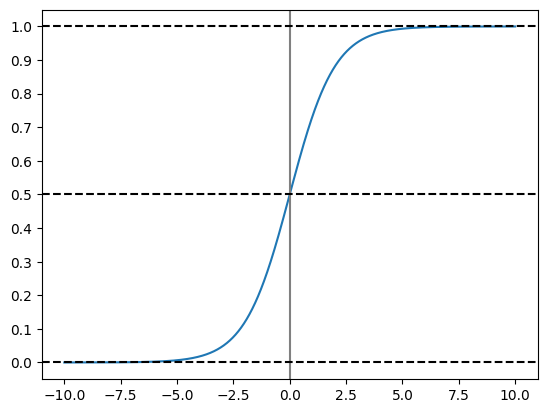

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
  return 1/(1 + np.exp(-x))

x = np.linspace(-10,10,5000)
plt.plot(x,logistic(x))

plt.yticks(np.linspace(0.0,1.0, 11))
plt.axvline(x = 0.0, linestyle = '-', color = 'grey')
plt.axhline(y = 1.0, linestyle = '--', color = 'black')
plt.axhline(y = 0.5, linestyle = '--', color = 'black')
plt.axhline(y = 0.0, linestyle = '--', color = 'black')
plt.show()

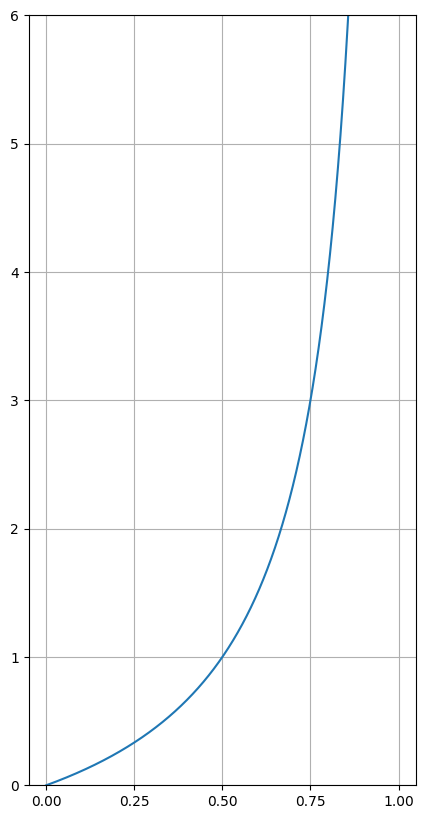

In [122]:
# draw odds
def odds(p):
  return p/(1-p)

fig,ax = plt.subplots(figsize =(5,10))
x = np.linspace(0,1,5000)
plt.xticks([0.0,0.25,0.50,0.75,1.0])
plt.ylim(0,6)
plt.plot(x,odds(x))
plt.grid()
plt.show()

# 1. 로지스틱 회귀 binary classification

In [123]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [124]:
print(type(body['gender'][0]))
body.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [125]:
body['gender'] = np.where(body['gender']=='M', 0, 1)
body['class_1'] = np.where(body['class'] == 'A', 1, 0)

In [126]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [127]:
from sklearn.model_selection import train_test_split

# x,y 자체는 pd.DataFrame으로 가져가고, model 에 pass할때만 np.array로 바꿔보자
feature_columns = body.columns.difference(['class','class_1'])
x = body[feature_columns]
y = body['class_1']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1, stratify = y)
print(X_train.shape)

(9375, 11)


In [128]:
# LogisticRegression모델에 데이터를 학습시켜보자
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state = 45)
logR.fit(X_train,y_train)


LogisticRegression(random_state=45)

In [129]:
# predict_proba 메서드와 decision_function 메서드를 사용해 로지스틱 회귀 그래프를 그려보자

proba = logR.predict_proba(X_train)

df_proba = pd.DataFrame(proba, columns = ['1-P(A)','P(A)'])
df_proba

,1-P(A),P(A)
0,0.876574,0.123426
1,0.310382,0.689618
2,0.575150,0.424850
3,0.212962,0.787038
4,0.998880,0.001120
...,...,...
9370,0.189770,0.810230
9371,0.982677,0.017323
9372,0.999909,0.000091
9373,0.053877,0.946123


In [130]:
cs = logR.decision_function(X_train)
df = pd.concat([df_proba,pd.DataFrame(cs, columns = ['decision function'])], axis = 1)
df

,1-P(A),P(A),decision function
0,0.876574,0.123426,-1.960381
1,0.310382,0.689618,0.798334
2,0.575150,0.424850,-0.302896
3,0.212962,0.787038,1.307161
4,0.998880,0.001120,-6.793432
...,...,...,...
9370,0.189770,0.810230,1.451508
9371,0.982677,0.017323,-4.038218
9372,0.999909,0.000091,-9.303471
9373,0.053877,0.946123,2.865666


In [131]:
# decision_function에 대한 해석
print(logistic(df.loc[:,'decision function'][0]))
print(logistic(df.loc[:,'decision function'][0]) == df.loc[:,'P(A)'][0])

0.12342582904839385
True


In [132]:
df.sort_values(by = ['decision function'], inplace = True)
df

,1-P(A),P(A),decision function
5957,1.000000,6.535395e-09,-18.846033
497,1.000000,3.584708e-08,-17.144004
3607,1.000000,4.328107e-08,-16.955550
4459,1.000000,4.874286e-08,-16.836707
404,1.000000,6.917845e-08,-16.486576
...,...,...,...
4156,0.001377,9.986231e-01,6.586554
2135,0.001377,9.986233e-01,6.586699
4722,0.001340,9.986604e-01,6.614037
4558,0.000424,9.995757e-01,7.764646


In [133]:
df.reset_index(inplace = True)
df

,index,1-P(A),P(A),decision function
0,5957,1.000000,6.535395e-09,-18.846033
1,497,1.000000,3.584708e-08,-17.144004
2,3607,1.000000,4.328107e-08,-16.955550
3,4459,1.000000,4.874286e-08,-16.836707
4,404,1.000000,6.917845e-08,-16.486576
...,...,...,...,...
9370,4156,0.001377,9.986231e-01,6.586554
9371,2135,0.001377,9.986233e-01,6.586699
9372,4722,0.001340,9.986604e-01,6.614037
9373,4558,0.000424,9.995757e-01,7.764646


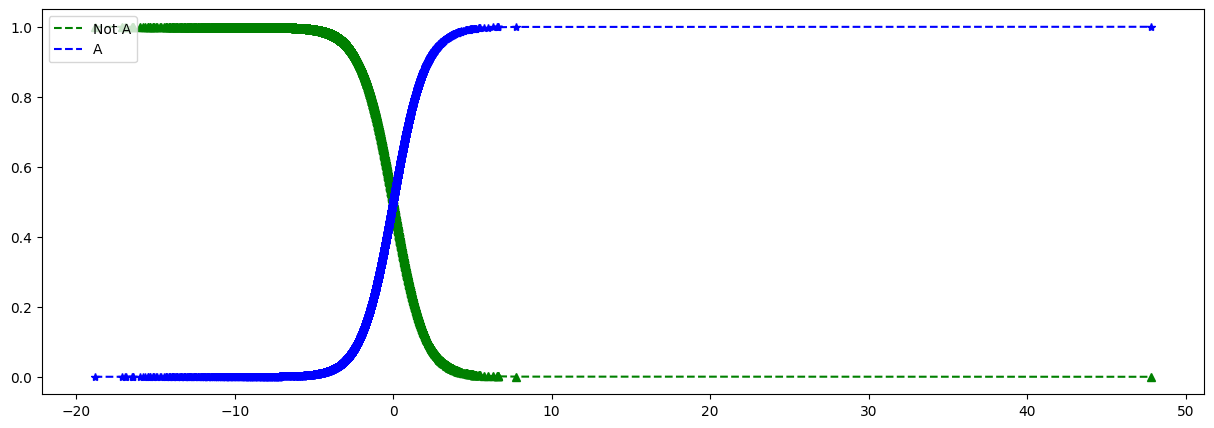

In [134]:
# Confidence Score에 따른 클래스 확률값을 매칭시키면 A클래스에 속할 추정확률과 결정경계(파란선)을 얻을 수 있다.

plt.figure(figsize = (15,5))

plt.plot(df['decision function'], df['1-P(A)'], 'g--', label = 'Not A')
plt.plot(df['decision function'], df['1-P(A)'], 'g^')
plt.plot(df['decision function'], df['P(A)'], 'b--', label = 'A')
plt.plot(df['decision function'], df['P(A)'], 'b*')

plt.xlabel
plt.ylabel
plt.legend(loc = 'upper left')
plt.show()

In [135]:
# 테스트 데이터세트에 대한 분류 모델의 성능평가를 수행해보자
# 혼동행렬, 정확도, 정밀도, 재현율, F1 스코아, AUC값을 반환해보자

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(X_test)

test_cm = confusion_matrix(y_test, pred)

test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
print(test_cm)
print('정확도 \t{}%'.format(round(test_acc*100,2)))
print('정밀도 \t{}%'.format(round(test_prc*100,2)))
print('재현율 \t{}%'.format(round(test_rcll*100,2)))
print('F1스코어 \t{}%'.format(round(test_f1*100,2)))
pred

[[2768  246]
 [ 352  652]]
정확도 	85.12%
정밀도 	72.61%
재현율 	64.94%
F1스코어 	68.56%


array([0, 1, 1, ..., 0, 0, 0])

[]

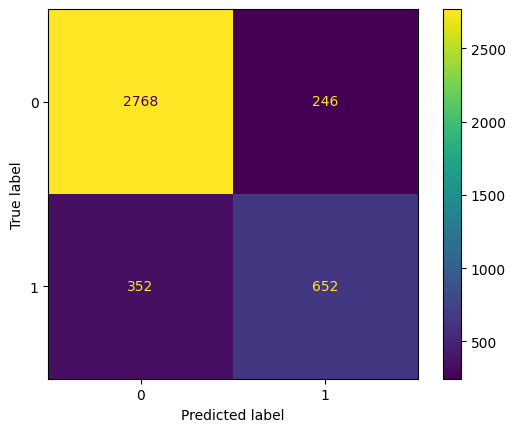

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logR, X_test, y_test)
plt.plot()

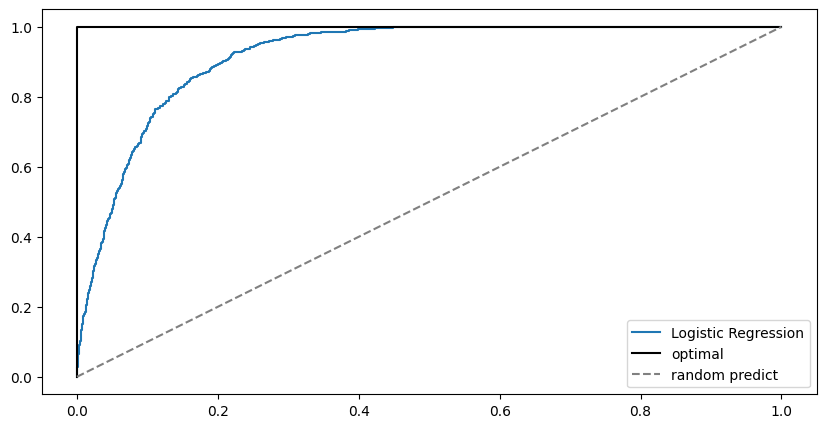

AUC 	0.92


In [137]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (10,5))
fpr, tpr, thres = roc_curve(y_test, logR.predict_proba(X_test)[:,1], pos_label = 1)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,0,1],[0,1,1],label = 'optimal', color = 'black')
plt.plot([0,1],[0,1],label = 'random predict', color = 'grey', linestyle = '--')
plt.legend()
plt.show()
auc = auc(fpr, tpr)
print("AUC \t{}".format(round(auc,2)))

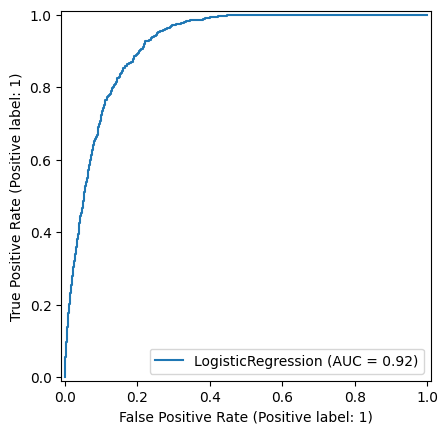

In [138]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, X_test, y_test)
plt.show()

# 2. 다중 클래스 분류 - 소프트맥스 회귀

In [139]:
body = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body

body['gender'] = np.where(body['gender']=='M', 0,1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(body['class'])

le.classes_
le.transform(body['class'])

array([2, 0, 2, ..., 0, 3, 2])

In [140]:
body['class_2'] = le.transform(body['class'])
body['class_2']

,class_2
0,2
1,0
2,2
3,1
4,1
...,...
13388,2
13389,3
13390,0
13391,3


In [141]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [142]:
x = body[feature_columns]
y = body['class_2']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

print(X_train.shape)

(9375, 11)


In [143]:
softm = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 45, C = 10)
softm.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [144]:
pred = softm.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)

print('정확도 \t{}%'.format( round(test_acc * 100,2)))

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]
정확도 	59.91%


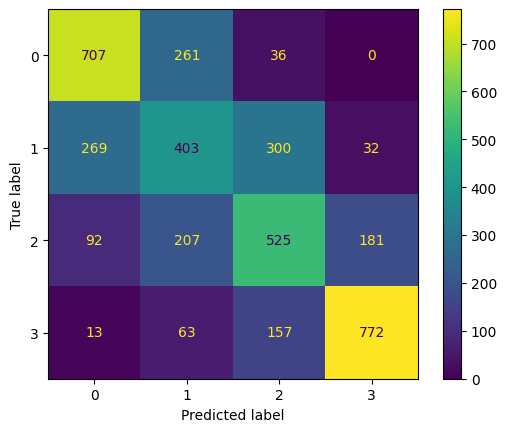

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(softm, X_test, y_test)
plt.show()

In [146]:
# X_test의 마지막 행 데이터가 각 클래스에 속할 추정확률은 다음과 같이 구할 수 있다.
softm.predict_proba([X_test.iloc[-1,:]])

array([[0.62639861, 0.31190065, 0.06015628, 0.00154446]])

In [147]:
pred[-1]

0

In [148]:
print( np.argmax(softm.predict_proba([X_test.iloc[-1,:]]),axis = 1) == pred[-1] )

[ True]
